# Lending Club Loan Credit Risk Analysis

# 1. Excutive Summary

In this project, I will use 2008-2010 lending club loan with more than 80 features to predict whether this borrower will past due. Here, past due includes past due for 16-30 days, 31-120 days, default, charge_off. I excluded current loans in analysis. 

I did a lot of exploratory data analysis by visualizing each variables, understanding the business meaning, and conducting hypothesis testing to see whether they are powerful predictors for past due behavior. To get the data ready for modeling, I standardized the numerical variables, manipulated missing values, and split training and testing data.

In modeling part, I tried to use PCA to reduce the number of features, and did ovev-sampling using SMOTE algorithm. Both of them made the model performance better, but not significantly. 

Given more time, I have several to-dos to improve the project:

1) tuning the model using cross validation and grid search, especially for a more effective regularization parameter

2) interpret the model result from both investors and Lending Club perspective

3) organize the formate, especially needs a table of content

4) simplize the modeling part, redundent code can be organized into functions

5) a more detailed summary stats in the end

# 2. Load data and dictionary

In [1]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
color = sns.color_palette()
%matplotlib inline
from IPython.display import HTML   #to fit the output from carto into jupyter notebook
from scipy import stats  # for chi2 square test
from string import ascii_letters
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('data/loan.csv')
# source: https://www.kaggle.com/wendykan/lending-club-loan-data
# original source: https://www.lendingclub.com/info/download-data.action
data_dic = pd.read_excel('data/LCDataDictionary.xlsx')

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# df.head()

In [4]:
# df.info()

In [5]:
# df.columns

In [6]:
data_dic

,LoanStatNew,Description
0,User feature (general),NaN
1,addr_state,The state provided by the borrower in the loan...
2,emp_length,Employment length in years. Possible values ar...
3,emp_title,The job title supplied by the Borrower when ap...
4,home_ownership,The home ownership status provided by the borr...
5,member_id,A unique LC assigned Id for the borrower member.
6,zip_code,The first 3 numbers of the zip code provided b...
7,NaN,NaN
8,User feature (financial specific),NaN
9,Income,NaN


## select time frame
select 2008 to 2010, from http://www.lendingmemo.com/lending-club-prosper-default-rates/ the chart we see in 2010, in 2010, the default rate first drop to 5%, which is an average of nowadays, so I want to investigate the years. And the data is not so large, suitable for ML on my singel laptop. If adding more data, we will need to cooperate virtual machine or distributed system, which is not the most important learning point here at the begining. 

In [7]:
mask2008 = df['issue_d'].str.contains('2008')
mask2009 = df['issue_d'].str.contains('2009')
mask2010 = df['issue_d'].str.contains('2010')

In [8]:
df08_10 = df[mask2008 | mask2009 | mask2010]

In [9]:
df08_10.shape

(20211, 74)

# 3. Data Cleaning & EDA

## 3.1 Missing value treatment - part I

reference: 

python data science handbook chap 3 handle missing value; data indexing and selection

https://chrisalbon.com/python/data_wrangling/pandas_missing_data/

In [10]:
# see how many missing values
df08_10.isnull().sum().value_counts()

0        43
20211    21
1136      1
353       1
12506     1
18264     1
4283      1
49        1
45        1
13        1
17799     1
1         1
dtype: int64

In [11]:
# create a filter to get rid of variables with more than 50% of null value
missing_more_than_50perc = df08_10.isnull().sum() < df08_10.shape[0]*0.5

In [12]:
# apply the missing value filter to get rid of features with more than 50% of missing values
df_cut50 = df08_10.loc[:,missing_more_than_50perc]
df_cut50.shape

(20211, 50)

In [13]:
loan = df_cut50

## 3.2 EDA - target variable

### 3.2.1 Loan_status

In [14]:
loan['loan_status'].isnull().sum()

0

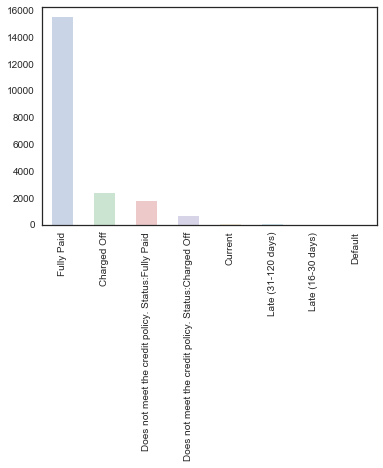

In [15]:
loan.loan_status.value_counts().plot(kind='bar',alpha=.30)

############ Add some description on what does each status mean, refer to lending club website

In [16]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (16-30 days)',
       'Late (31-120 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [17]:
loan['loan_status_clean'] = loan['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0, 'Current': 2, 'Late (16-30 days)': 0, \
       'Late (31-120 days)': 0, 'Default': 0, \
       'Does not meet the credit policy. Status:Fully Paid': 3, \
       'Does not meet the credit policy. Status:Charged Off': 3 })

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### 3.2.1.1 remove "current" status loans

################## add more reasons

In [18]:
loan = loan[loan['loan_status_clean'] != 2]
loan.shape

(20204, 51)

#### 3.2.1.2 exclude unrelated information

Ignore 'Does not meet the credit policy. Status:Fully Paid' and 'Does not meet the credit policy. Status:Charged Off' in load status. LC hasn't said anywhere public what these loans are, but someone here talked with LC about this, and there's a bit of an explanation in some message here somewhere.  Perhaps you could search for "does not meet...".  If I remember correctly it means something like the credit policy was updated after this loan was listed but before it issued.  The credit policy changes all the time I imagine, so this is something I believe we should ignore.

reference: https://forum.lendacademy.com/?topic=2427.msg20813#msg20813

In [19]:
loan = loan[loan['loan_status_clean'] != 3]
loan.shape

(17807, 51)

#### 3.2.1.1 create "loan_status_clean" - define positive for target variable by aggregating several categories

reference to understand loan status: https://www.orchardplatform.com/blog/understanding-loan-statuses/

In [20]:
loan['loan_status_clean'] = loan['loan_status_clean'].apply(lambda loan_status_clean: 1 \
                                                           if loan_status_clean == 0 \
                                                           else 0)

In [21]:
loan['loan_status_clean'].unique()

array([0, 1])

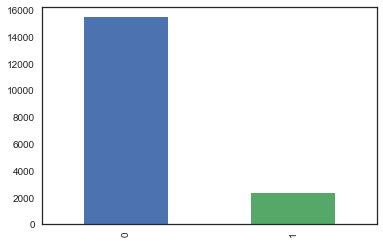

In [22]:
loan['loan_status_clean'].value_counts().plot(kind = 'bar')

## 3.3 EDA - general user features

### 3.3.1 addr_state

In [23]:
loan['addr_state'].isnull().sum()

0

leverage https://carto.com/ to create goegraphic visualizations, needs to sign up first. ###############add more explanation on how it did it and rephraze them all

Before mapping our data, cartodb uses an intelligent way, in this instance, in converting State acronyms into latitude and longitude.

After selecting the features we want to play with, cartodb generates a map and ways to share it. One of the ways is using IFrame. IFrame uses HTML to embed content from one source into another.

In [24]:
loan_state = pd.crosstab(loan['addr_state'], loan['loan_status_clean'])
#loan_state['addr_state'] = loan_state.index
loan_state.reset_index(level = 0, inplace = True)            #make the state into a column instead of index
loan_state['total'] = loan_state[0] + loan_state[1]
loan_state.head(5)
#loan_state.to_csv('data/loan_state.csv', index=False)

loan_status_clean,addr_state,0,1,total
0,AK,25,5,30
1,AL,183,22,205
2,AR,87,13,100
3,AZ,342,52,394
4,CA,2754,489,3243


to get the data ready for carto, I also deleted the header, and calculated past due rate by state in Excel.

In [25]:
from IPython.display import HTML
HTML("<iframe width='100%' height='520' frameborder='0' src='https://becliu.carto.com/builder/676c2fc9-932b-4dd0-bf58-10ec4c00e381/embed' allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>")

In [1002]:
HTML("<iframe width='100%' height='520' frameborder='0' src='https://becliu.carto.com/builder/87fb84f2-3421-4612-a2d9-8a8cca3e3245/embed' allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>")

############## refrase them all 


The above map is referred to as the choropleth map, "a thematic map in which areas are shade patterned in proportion to the measurement of the statistical variable being displayed." (wikipedia)

As the intensity of the color increases (gets closer to 1), on average the majority of the people residing in that state have paid of their loan.

The number near the point references the amount of loans given in that state.

By the looks of the map I wouldn't give loans out to Oregon, Wisconsin, Nevada, Tennessee, Virginia, Indianapolis, maybe a few others.

Of course this an average of individual loans, per state, discounting specific regions of the state, and is not the best estimate for whether a funded individual in that state is likely to repay their loan.

However, maybe the other features could help determine which state is less likelier to pay off a loan.

In [27]:
cross_tab = pd.crosstab(loan['loan_status_clean'], loan['addr_state'])
cross_tab.index = ['0', '1']
cross_tab

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,25,183,87,342,2754,348,313,95,49,1033,...,19,13,1122,100,609,19,300,173,76,40
1,5,22,13,52,489,55,36,7,8,208,...,4,2,137,22,73,2,56,28,9,1


In [28]:
chi2, p_addr_state, dof, ex = stats.chi2_contingency(observed = cross_tab, correction=False) 
p_addr_state

1.0897062156010335e-08

write preprocessing for chi-square test and the test as a combined function:

In [29]:
def chi2_test(column_name):
    from scipy import stats
    cross_tab = pd.crosstab(loan['loan_status_clean'], loan[column_name])
    cross_tab.index = ['0', '1']
    chi2, p_value, dof, ex = stats.chi2_contingency(observed = cross_tab, correction=False) 
#    p_column_name
    print("p_value:" + str(round(p_value,4)))

In [30]:
chi2_test('addr_state')

p_value:0.0


### 3.3.2 emp_length

emp_length with int_rate : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

#### 3.3.2.1 missing value treatment

In [31]:
loan['emp_length'].isnull().sum()

319

In [32]:
loan[loan['emp_length'].isnull() == True].loan_status_clean.value_counts()

0    244
1     75
Name: loan_status_clean, dtype: int64

#### 3.2.2.2 visualization

In [33]:
loan.groupby('emp_length')['loan_status_clean'].value_counts().unstack().reset_index()

loan_status_clean,emp_length,0,1
0,1 year,1415,218
1,10+ years,3041,477
2,2 years,1979,276
3,3 years,1727,247
4,4 years,1323,207
5,5 years,1235,176
6,6 years,730,97
7,7 years,608,104
8,8 years,578,76
9,9 years,496,68


In [34]:
emp_length_sta = loan.groupby('emp_length')['loan_status_clean'].value_counts().unstack().reset_index()
emp_length_sta.columns

Index(['emp_length', 0, 1], dtype='object', name='loan_status_clean')

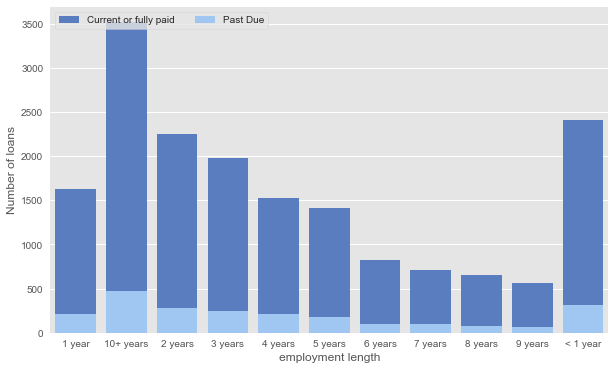

In [1001]:
# calculate total of defaul and non-default
emp_length_sta['total'] = emp_length_sta[0] + emp_length_sta[1]
# set general plot properties
plt.subplots(figsize = (10,6))
ax = plt.axes()
# Plot 1 - background - "total" (top) series
sns.set_color_codes("muted")
sns.barplot(y="total", x = "emp_length", data = emp_length_sta, label = "Current or fully paid", color = 'b')
#Plot 2 - overlay - "bottom" series
sns.set_color_codes("pastel")
sns.barplot(y=1, x = "emp_length", data = emp_length_sta, label = "Past Due", color = "b")
# Add a legend 
ax.legend(ncol=2, loc="upper left", frameon=True) 
# add label
ax.set(ylabel="Number of loans",
       xlabel="employment length")
# remove rim of table
sns.despine(left=True, bottom=True)
# reference: https://github.com/noahgift/spot_price_machine_learning/blob/master/notebooks/spot_pricing_ml.ipynb
# reference: http://randyzwitch.com/creating-stacked-bar-chart-seaborn/

if the borrower works more than 10 years or less than 1 year, they have significantly higher risk of not fully pay the loan. With more time, I would like to see the default reason, probably the elder people and entry-level employees have specific reasons for loans that makes them risker than people of other length of employement.

#### 3.2.2.3 hypothesis testing

In [36]:
from scipy import stats
# reference: http://www.scipy-lectures.org/packages/statistics/index.html#student-s-t-test-the-simplest-statistical-test

In [37]:
emp_length_ht = loan[['emp_length','loan_status_clean']]

In [38]:
emp_length_ht['emp_length'].unique()

array(['7 years', '< 1 year', '10+ years', '5 years', '2 years',
       '8 years', '3 years', nan, '1 year', '4 years', '6 years',
       '9 years'], dtype=object)

In [39]:
chi2_test('emp_length')

p_value:0.6561


P-value is 0.6561, larger than any significant level, we cannot say emp_length is significantly related to past due or not. let's try regroup the levels of emp_length.

#### 3.2.2.3 feature engineer & hypothesis testing - regroup the levels in emp_length

In [40]:
cross_tab = pd.crosstab(loan['loan_status_clean'], loan['emp_length'])
cross_tab.index = ['0','1']
cross_tab.apply(lambda x: x / x.sum())

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,0.866503,0.864412,0.877605,0.874873,0.864706,0.875266,0.882709,0.853933,0.883792,0.879433,0.870954
1,0.133497,0.135588,0.122395,0.125127,0.135294,0.124734,0.117291,0.146067,0.116208,0.120567,0.129046


In [41]:
emp_length_rate = cross_tab.apply(lambda x: x / x.sum()).loc[['1']]

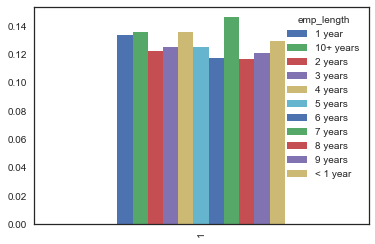

In [42]:
emp_length_rate.plot(kind = 'bar')

different age group really doesn't seems to have different past due ratio.

In [43]:
groupA = ["7 years"] 
groupB = ["4 years","10+ years", "1 year"]                  
groupC = ["2 years", "3 years","5 years","< 1 year"]  
groupD = ["6 years", "8 years", "9 years"]

In [44]:
loan['emp_length_group'] = emp_length_ht['emp_length'].apply(lambda x: 'A' if x in groupA
                                                                        else 'B' if x in groupB
                                                                        else 'C' if x in groupC
                                                                        else 'D' if x in groupD
                                                                        else x)

In [45]:
chi2_test('emp_length_group')

p_value:0.0673


In [46]:
loan.shape

(17807, 52)

The p-value is much improved. So I will use the grouped feature emp_length.

### 3.3.3 emp_title

In [47]:
loan['emp_title'].isnull().sum()

1006

In [48]:
# most of the emp_title are unique
loan['emp_title'].value_counts().value_counts()

1     12730
2       734
3       169
4        85
5        44
6        30
7        21
9        12
8        11
10       10
11        9
13        6
16        6
18        4
14        3
17        3
20        3
21        2
12        2
19        2
26        2
25        1
55        1
34        1
23        1
28        1
29        1
22        1
43        1
Name: emp_title, dtype: int64

In [49]:
chi2_test('emp_title')

p_value:0.0004


Thought the p-value 0.0004 is very small, it's highly likely because of so many unique emp_title. I will consider dropping the variable.

In [50]:
################How should I deal with the variable with so many levels?

### 3.3.4 home_ownership

In [51]:
loan['home_ownership'].isnull().sum()

0

In [52]:
loan['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER', 'NONE'], dtype=object)

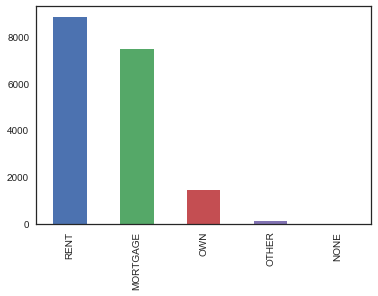

In [53]:
loan['home_ownership'].value_counts().plot(kind = 'bar')

In [54]:
cross_tab = pd.crosstab(loan['loan_status_clean'], loan['home_ownership'])
cross_tab.index = ['0','1']
cross_tab

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
0,6522,1,80,1241,7631
1,924,0,17,185,1206


In [55]:
cross_tab.apply(lambda x: x/x.sum())

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
0,0.875907,1.0,0.824742,0.870266,0.863528
1,0.124093,0.0,0.175258,0.129734,0.136472


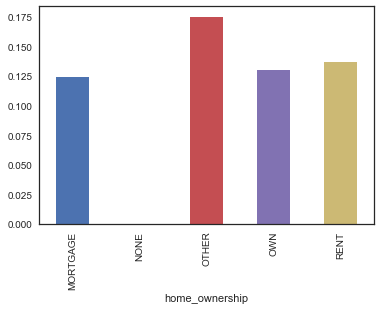

In [56]:
cross_tab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar')

In [57]:
chi2_test('home_ownership')

p_value:0.1215


There is a missing value "NONE", which potentially influenced the chi square test result, I will remove it and conduct chi square test again. 

In [58]:
cross_tab_nonone = cross_tab.drop('NONE', axis = 1)
cross_tab_nonone

home_ownership,MORTGAGE,OTHER,OWN,RENT
0,6522,80,1241,7631
1,924,17,185,1206


In [59]:
chi2, p_home_ownership_nonone, dop, ex = stats.chi2_contingency(observed = cross_tab_nonone)
round(p_home_ownership_nonone, 4)

0.0677

### 3.3.5 zip_code

In [60]:
loan['zip_code'].isnull().sum()

0

Let's concatinate the state and zipcode to get a more accurate geographic information.

In [61]:
loan['zip_state'] = loan[['addr_state', 'zip_code']].apply(lambda x: ''.join(x), axis=1)

In [62]:
loan['zip_state'].head(5)

21494    CA939xx
21517    GA300xx
21528    MD212xx
21530    NY100xx
21532    CA945xx
Name: zip_state, dtype: object

In [63]:
chi2_test('zip_code')

p_value:0.0


In [64]:
chi2_test('zip_state')

p_value:0.0


Since zip_state is more significantly related to past due or not, I will consider using zip_state instead only zip_code

## 3.4 EDA - user financial features

### 3.4.1 annual_inc

In [65]:
loan['annual_inc'].isnull().sum()

0

#### 3.4.1.1 visualization

[(0, 400000)]

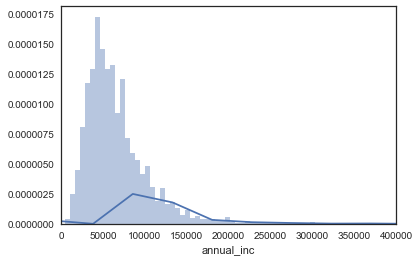

In [66]:
g = sns.distplot(loan['annual_inc'], bins=1000)
g.set(xlim=(0, 400000))

[(0, 100000)]

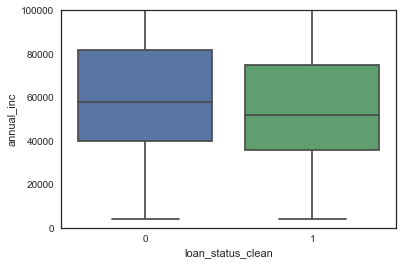

In [67]:
annual_inc_boxplot = sns.boxplot(x = loan['loan_status_clean'], y = loan['annual_inc'])
annual_inc_boxplot.set(ylim = (0, 100000))

#### 3.4.1.2 hypothesis testing - ANOVA

To see whether there's a statistical significant difference between the annual income level between current/fully paid borrowers.

reference: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [68]:
from scipy import stats

In [69]:
grps = pd.unique(loan.loan_status_clean.values)
d_data = {grp:loan['annual_inc'][loan.loan_status_clean == grp] for grp in grps}
list(d_data)

[0, 1]

In [70]:
k = len(pd.unique(loan.loan_status_clean))  # number of conditions
N = len(loan.values)  # conditions times participants
n = loan.groupby('loan_status_clean').size()[0] #Participants in each condition

In [71]:
F, p = stats.f_oneway(d_data[0], d_data[1])
round(p, 4)

0.0002

make the process a function

In [72]:
def anova(column_name):
    from scipy import stats
    grps = pd.unique(loan.loan_status_clean.values)
    d_data = {grp:loan[column_name][loan.loan_status_clean == grp] for grp in grps}
    
    k = len(pd.unique(loan.loan_status_clean))  # number of conditions
    N = len(loan.values)  # conditions times participants
    n = loan.groupby('loan_status_clean').size()[0] #Participants in each condition
    
    F, p = stats.f_oneway(d_data[list(d_data)[0]], d_data[list(d_data)[1]])
    print("p_value:" + str(round(p, 4)))

In [73]:
anova('annual_inc')

p_value:0.0002


It looks like a very powerful feature!

### 3.4.2 verification_status

In [74]:
loan['verification_status'].isnull().sum()

0

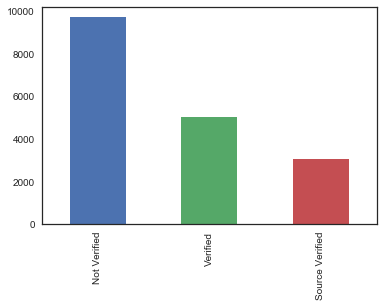

In [75]:
loan['verification_status'].value_counts().plot(kind = "bar")

In [76]:
vs_crosstab = pd.crosstab(loan['loan_status_clean'], loan['verification_status'])
vs_crosstab.index = ['0','1']
vs_crosstab

verification_status,Not Verified,Source Verified,Verified
0,8521,2662,4292
1,1204,395,733


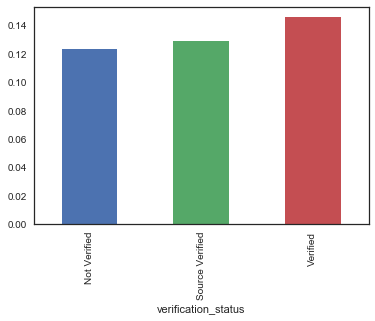

In [77]:
vs_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar')

since the risker Lending Club think the loan is, the more likely they will check conduct verification on income, so verified loans has higher past due ratio

In [78]:
chi2_test('verification_status')

p_value:0.0008


### 3.4.3 dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [79]:
loan['dti'].isnull().sum()

0

In [80]:
anova('dti')

p_value:0.0


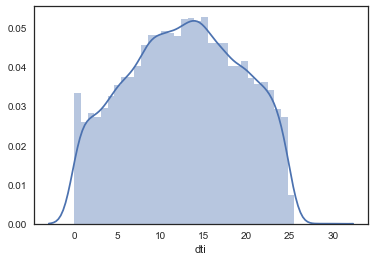

In [81]:
sns.distplot(loan['dti'])

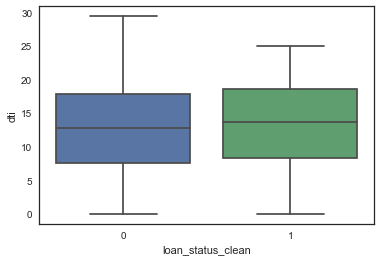

In [82]:
sns.boxplot(y = loan['dti'], x = loan['loan_status_clean'])

## 3.5 EDA - Credit Scores

### 3.5.1 earliest_cr_line
The month the borrower's earliest reported credit line was opened

In [83]:
loan['earliest_cr_line'].isnull().sum()

0

In [84]:
loan['earliest_cr_line'].value_counts()

Oct-1999    180
Dec-1998    168
Dec-1997    162
Dec-1995    160
Nov-1998    154
Oct-1998    145
Sep-2000    142
Nov-1999    142
Oct-2000    142
Sep-2001    141
Nov-1997    139
Sep-1999    137
Nov-2000    135
Dec-1999    131
Nov-1996    131
Dec-2000    130
Dec-1996    128
Aug-1998    128
Oct-1997    124
Jul-2000    120
Sep-2002    119
Oct-2004    117
Jul-1999    116
Oct-2002    116
Feb-1999    114
Oct-2001    113
Dec-1994    112
Jan-1999    111
Nov-1995    110
Jan-1996    109
           ... 
May-1972      1
Jul-1967      1
Feb-1968      1
May-1967      1
Sep-1974      1
Nov-1968      1
Mar-1970      1
Jun-1970      1
Jan-1963      1
Mar-1966      1
Oct-1969      1
Sep-1964      1
Nov-1961      1
Aug-1972      1
Sep-1971      1
Apr-1967      1
Apr-1969      1
Dec-1965      1
Aug-1974      1
Nov-1962      1
Nov-1970      1
Feb-1969      1
Oct-1974      1
Jul-1974      1
Oct-1968      1
Dec-1968      1
Nov-1954      1
Jan-1972      1
Mar-1969      1
Sep-1962      1
Name: earliest_cr_line, 

#### 3.5.1.1 feature engineering

In [85]:
#loan['earliest_cr_line'].values[0]

In [86]:
#from datetime import datetime

#loan['earliest_cr_line'].values.apply(lambda x: datetime.strptime(s, '%B-%Y'))
#s = "May-1989"
#d = datetime.strptime(s, '%B-%Y')
#d.strftime('%Y')

#reference: https://docs.python.org/2/library/datetime.html
#reference: https://stackoverflow.com/questions/42980662/convert-string-with-month-name-to-datetime

In [87]:
from datetime import datetime
loan['earliest_cr_line_yr'] = loan['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%Y').strftime('%Y'))

In [88]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%Y').strftime('%m'))

#### 3.5.1.2 visualization - count

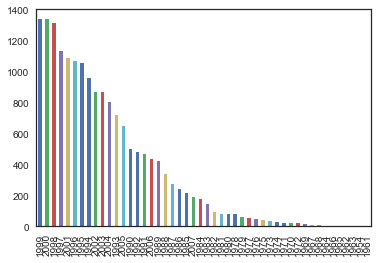

In [89]:
loan['earliest_cr_line_yr'].value_counts().plot(kind = "bar")

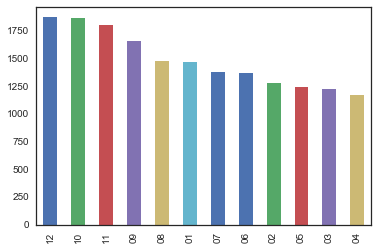

In [90]:
loan['earliest_cr_line_month'].value_counts().plot(kind = "bar")

#### 3.5.1.2 visualization - past due ratio

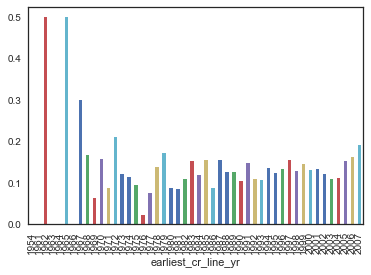

In [91]:
vs_crosstab = pd.crosstab(loan['loan_status_clean'], loan['earliest_cr_line_yr'])
vs_crosstab.index = ['0','1']
vs_crosstab
vs_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar')

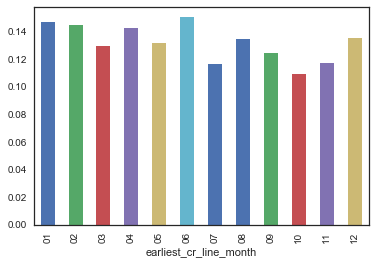

In [92]:
vs_crosstab = pd.crosstab(loan['loan_status_clean'], loan['earliest_cr_line_month'])
vs_crosstab.index = ['0','1']
vs_crosstab
vs_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar')

#### 3.5.1.3 hypothesis testing

In [93]:
chi2_test('earliest_cr_line_yr')

p_value:0.0246


In [94]:
chi2_test('earliest_cr_line_month')

p_value:0.0075


In [95]:
chi2_test('earliest_cr_line')

p_value:0.4142


Both newly-created feature looks good compared to the original one. Though I still need to add time-series analysis, for now , I will use the feature as simple categorical variable

How should I better use this time series variable?

### 3.5.2 inq_last_6mths
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

float type, numerical variable

In [96]:
loan['inq_last_6mths'].isnull().sum()

0

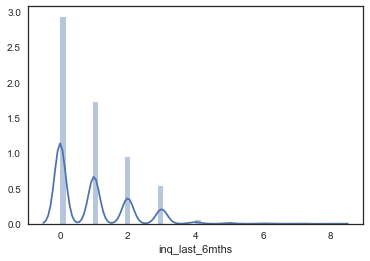

In [97]:
sns.distplot(loan['inq_last_6mths'])

In [98]:
anova('inq_last_6mths')

p_value:0.0


### 3.5.3 last_credit_pull_d
The most recent month LC pulled credit for this loan

In [99]:
cdtsc = loan[['earliest_cr_line','inq_last_6mths','last_credit_pull_d']]

In [100]:
loan['last_credit_pull_d'].isnull().sum()

1

In [101]:
loan['last_credit_pull_d'].head()

21494    Dec-2015
21517    Jan-2016
21528    Jan-2016
21530    Oct-2015
21532    Dec-2015
Name: last_credit_pull_d, dtype: object

In [106]:
last_credit_pull_d_nona = loan.dropna(subset=['last_credit_pull_d'])

In [107]:

from datetime import datetime

last_credit_pull_d_nona['last_credit_pull_d_yr'] = last_credit_pull_d_nona['last_credit_pull_d'].apply(lambda x: datetime.strptime(str(x),'%b-%Y').strftime('%Y'))

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [108]:
last_credit_pull_d_nona['last_credit_pull_d_month'] = last_credit_pull_d_nona['last_credit_pull_d'].apply(lambda x: datetime.strptime(str(x),'%b-%Y').strftime('%b'))


/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


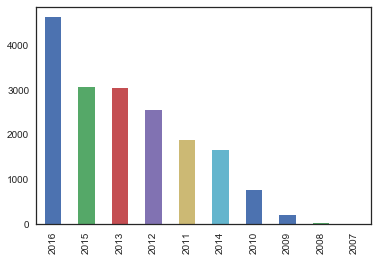

In [109]:
last_credit_pull_d_nona['last_credit_pull_d_yr'].value_counts().plot(kind = "bar")

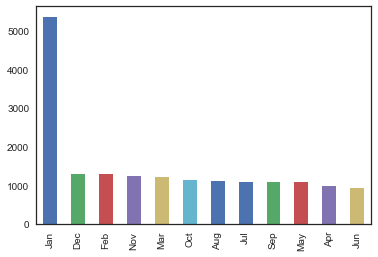

In [110]:
last_credit_pull_d_nona['last_credit_pull_d_month'].value_counts().plot(kind = "bar")

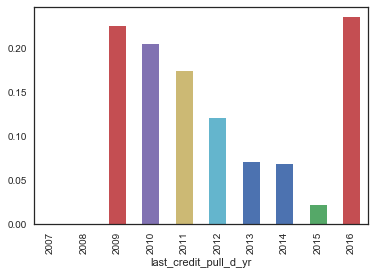

In [111]:
vs_crosstab = pd.crosstab(last_credit_pull_d_nona['loan_status_clean'], last_credit_pull_d_nona['last_credit_pull_d_yr'])
vs_crosstab.index = ['0','1']
vs_crosstab
vs_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar')

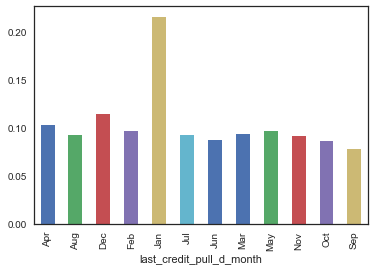

In [112]:
vs_crosstab = pd.crosstab(last_credit_pull_d_nona['loan_status_clean'], last_credit_pull_d_nona['last_credit_pull_d_month'])
vs_crosstab.index = ['0','1']
vs_crosstab
vs_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar')

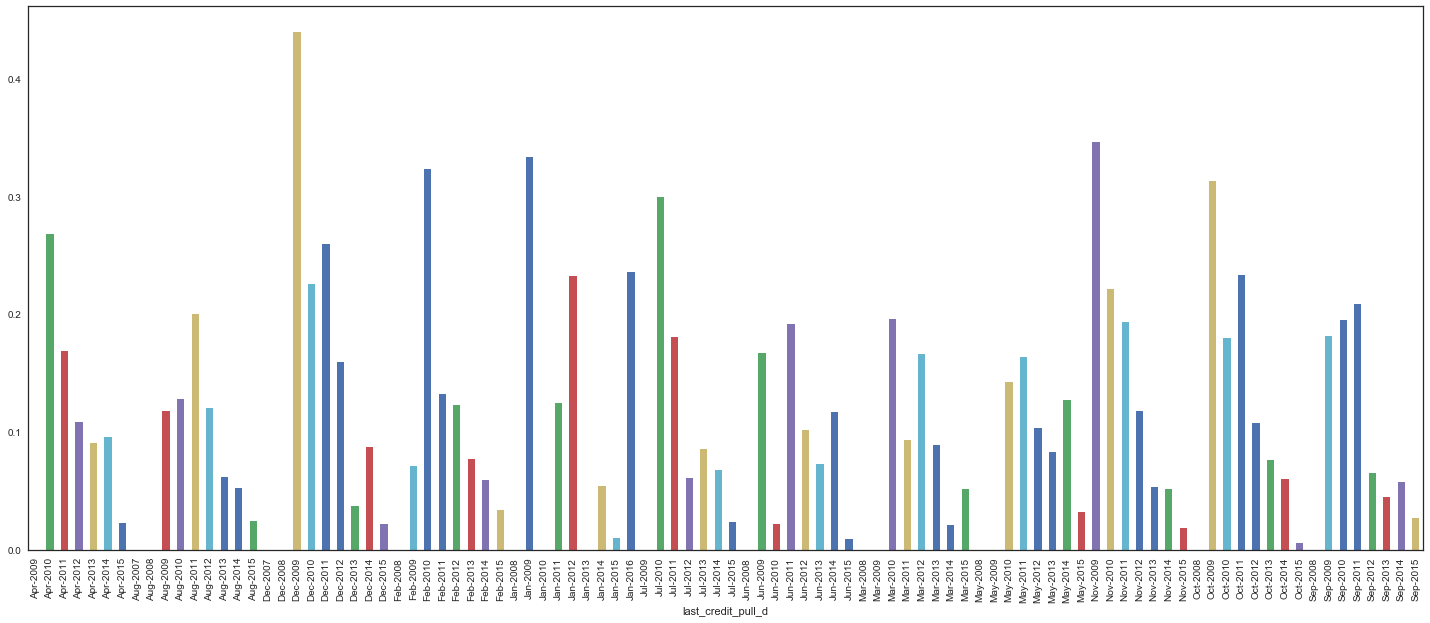

In [113]:
vs_crosstab = pd.crosstab(last_credit_pull_d_nona['loan_status_clean'], last_credit_pull_d_nona['last_credit_pull_d'])
vs_crosstab.index = ['0','1']
vs_crosstab
vs_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar', figsize = (25, 10))

Insteresting, it seems last credit pull in Jan is much more likely to past due. Why?

In [114]:
from scipy import stats
cross_tab = pd.crosstab(last_credit_pull_d_nona['loan_status_clean'], last_credit_pull_d_nona['last_credit_pull_d_yr'])
cross_tab.index = ['0', '1']
chi2, p_value, dof, ex = stats.chi2_contingency(observed = cross_tab, correction=False)
p_value

6.244526902972191e-211

In [115]:
from scipy import stats
cross_tab = pd.crosstab(last_credit_pull_d_nona['loan_status_clean'], last_credit_pull_d_nona['last_credit_pull_d_month'])
cross_tab.index = ['0', '1']
chi2, p_value, dof, ex = stats.chi2_contingency(observed = cross_tab, correction=False)
p_value

5.074510885688008e-100

In [116]:
from scipy import stats
cross_tab = pd.crosstab(last_credit_pull_d_nona['loan_status_clean'], last_credit_pull_d_nona['last_credit_pull_d'])
cross_tab.index = ['0', '1']
chi2, p_value, dof, ex = stats.chi2_contingency(observed = cross_tab, correction=False)
p_value

4.310223377808755e-191

The original variable seems better then the two newly created ones. 

need to remove missing value first, and then create the new feature here

In [117]:

#loan['last_credit_pull_d_yr'] = loan['last_credit_pull_d'].apply(lambda x: datetime.strptime(str(x),'%b-%Y').strftime('%Y'))


In [118]:

#loan['last_credit_pull_d_month'] = loan['last_credit_pull_d'].apply(lambda x: datetime.strptime(str(x),'%b-%Y').strftime('%Y'))


## 3.6 EDA - Credit Lines

In [119]:
credit_lines = loan[['total_acc','open_acc','acc_now_delinq',\
                     'delinq_2yrs','collections_12_mths_ex_med',\
                     'pub_rec','revol_util','revol_bal', 'policy_code', 'url']]

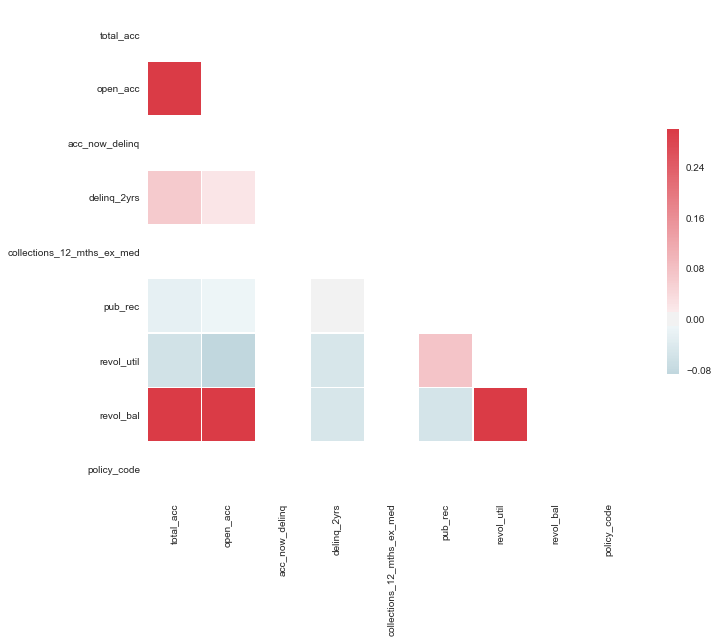

In [120]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = credit_lines.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### 3.6.1 total_acc
The total number of credit lines currently in the borrower's credit file

In [121]:
loan['total_acc'].isnull().sum()

0

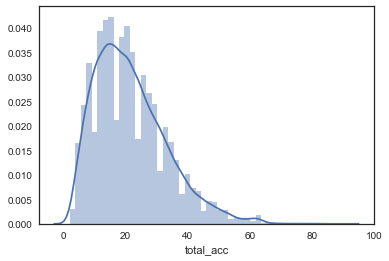

In [122]:
sns.distplot(loan['total_acc'])

In [123]:
anova('total_acc')

p_value:0.007


### 3.6.2 open_acc

In [124]:
loan['open_acc'].isnull().sum()

0

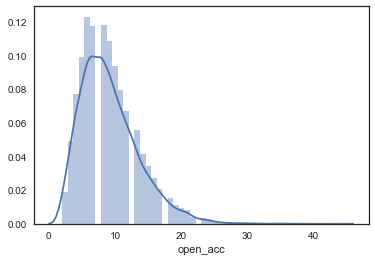

In [125]:
sns.distplot(loan['open_acc'])

In [126]:
anova('open_acc')

p_value:0.1639


### 3.6.3 acc_now_delinq

In [127]:
loan['acc_now_delinq'].isnull().sum()

0

In [128]:
loan['acc_now_delinq'].value_counts()

0.0    17807
Name: acc_now_delinq, dtype: int64

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


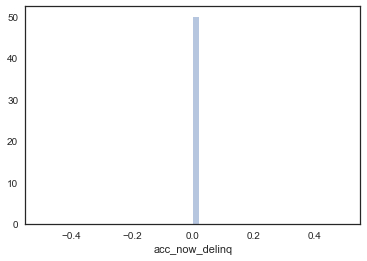

In [129]:
sns.distplot(loan['acc_now_delinq'])

In [130]:
anova('acc_now_delinq')

p_value:nan


/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/scipy/stats/stats.py:2926: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


### 3.6.4 delinq_2yrs

In [131]:
loan['delinq_2yrs'].isnull().sum()

0

In [132]:
loan['delinq_2yrs'].value_counts()

0.0    15875
1.0     1500
2.0      302
3.0       99
4.0       21
5.0        6
6.0        3
7.0        1
Name: delinq_2yrs, dtype: int64

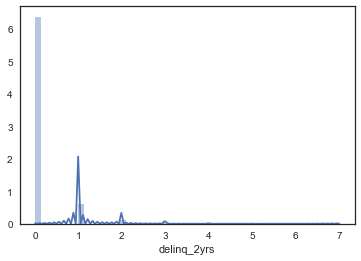

In [133]:
sns.distplot(loan['delinq_2yrs'])

In [134]:
anova('delinq_2yrs')

p_value:0.5887


### 3.6.5 collections_12_mths_ex_med
Number of collections in 12 months excluding medical collections

In [135]:
loan['collections_12_mths_ex_med'].isnull().sum()

0

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


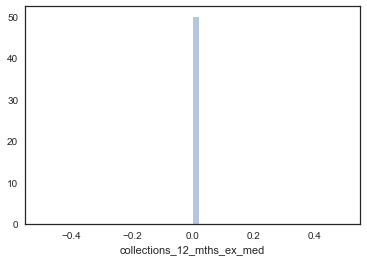

In [136]:
sns.distplot(loan['collections_12_mths_ex_med'])

In [137]:
anova('collections_12_mths_ex_med')

p_value:nan


/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/scipy/stats/stats.py:2926: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


### 3.6.6 revol_bal

In [138]:
loan['revol_bal'].isnull().sum()

0

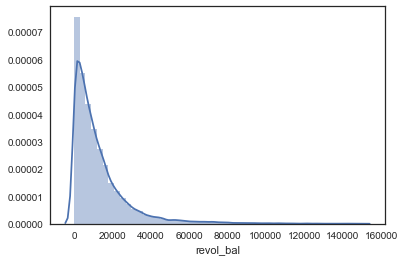

In [139]:
sns.distplot(loan['revol_bal'])

In [140]:
anova('revol_bal')

p_value:0.0348


### 3.6.7 revol_util

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [141]:
loan['revol_util'].isnull().sum()

41

In [142]:
loan_revol_util = loan.dropna(subset = ['revol_util'])

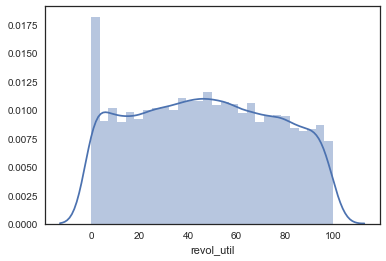

In [143]:
sns.distplot(loan_revol_util['revol_util'])

In [144]:
from scipy import stats
grps = pd.unique(loan_revol_util.loan_status_clean.values)
d_data = {grp:loan_revol_util['revol_util'][loan_revol_util.loan_status_clean == grp] for grp in grps}
list(d_data)
k = len(pd.unique(loan_revol_util.loan_status_clean))  # number of conditions
N = len(loan_revol_util.values)  # conditions times participants
n = loan_revol_util.groupby('loan_status_clean').size()[0] #Participants in each condition
F, p = stats.f_oneway(d_data[0], d_data[1])
round(p, 4)

0.0

## 3.7 EDA - Loan general features

### 3.7.1 application_type
Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [145]:
loan['application_type'].isnull().sum()

0

In [146]:
loan['application_type'].value_counts()

INDIVIDUAL    17807
Name: application_type, dtype: int64

### 3.7.2 desc
Loan description provided by the borrower

In [147]:
loan['desc'].isnull().sum()

3963

In [148]:
loan['desc'].head()

21494    Borrower added on 11/30/10 > Recently, I was a...
21517                                                  NaN
21528                                                  NaN
21530                                                  NaN
21532                                                  NaN
Name: desc, dtype: object

### 3.7.3 purpose
A category provided by the borrower for the loan request. 

In [149]:
loan['purpose'].isnull().sum()

0

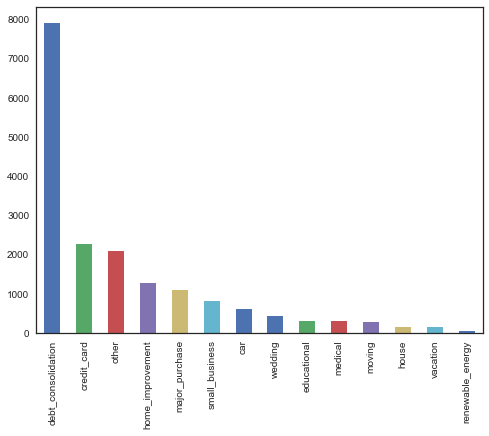

In [150]:
loan['purpose'].value_counts().plot(kind = "bar", figsize = (8, 6))

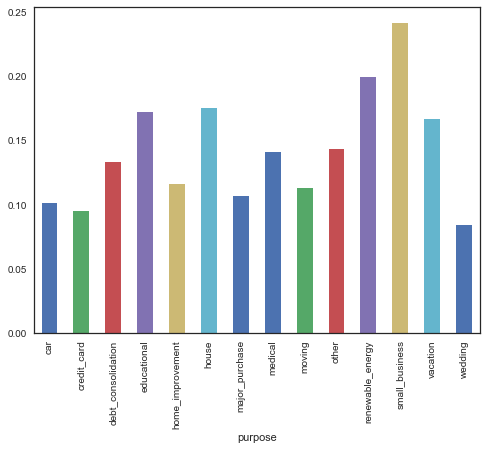

In [151]:
vs_crosstab = pd.crosstab(loan['loan_status_clean'], loan['purpose'])
vs_crosstab.index = ['0','1']
vs_crosstab
vs_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = 'bar', figsize = (8,6))

In [152]:
chi2_test('purpose')

p_value:0.0


### 3.7.4 term
The number of payments on the loan. Values are in months and can be either 36 or 60.

In [153]:
loan['term'].isnull().sum()

0

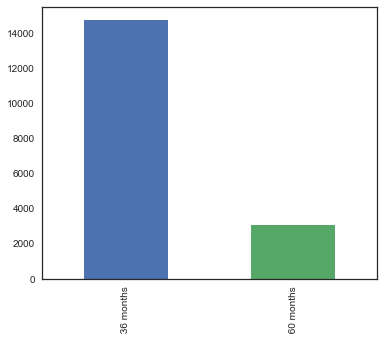

In [154]:
loan['term'].value_counts().plot(kind = "bar", figsize = (6,5))

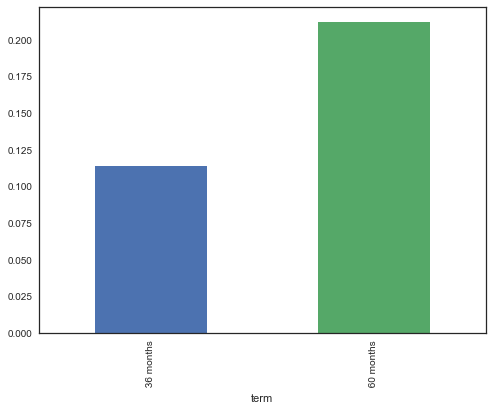

In [155]:
term_crosstab = pd.crosstab(loan['loan_status_clean'], loan['term'])
term_crosstab.index = ['0','1']
term_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = "bar", figsize = (8,6))

It seems 60 months loan has a much higher rate of past due then 36 months loans.

In [156]:
chi2_test('term')

p_value:0.0


### 3.7.5 title

In [157]:
loan['title'].isnull().sum()

11

In [158]:
loan['title'].value_counts()

Debt Consolidation                                  731
Personal Loan                                       312
Debt Consolidation Loan                             239
Consolidation                                       198
Credit Card Consolidation                           158
debt consolidation                                  153
Personal                                            131
Home Improvement                                    131
personal loan                                       129
personal                                            111
Consolidation Loan                                  106
Debt consolidation                                  105
Loan                                                103
Wedding                                              69
consolidation                                        65
Consolidate                                          58
Credit Card Payoff                                   57
Credit Card Loan                                

In [159]:
chi2_test('title')

p_value:0.1002


This title is very similar to purpose variable, if we have time, we can do NLP on this feature, or just combine similar contents such as "personal"/ "personal loan", and "consolidation"/"consolidate". SInce the chi2 test result is not significant, I won't use this feature. 

### 3.7.6 issue_d
The month which the loan was funded

In [160]:
loan['issue_d'].isnull().sum()

0

In [161]:
loan['issue_d'].value_counts()

Dec-2010    1262
Oct-2010    1133
Nov-2010    1121
Jul-2010    1119
Sep-2010    1087
Aug-2010    1078
Jun-2010    1029
May-2010     920
Apr-2010     827
Mar-2010     737
Feb-2010     627
Nov-2009     602
Dec-2009     598
Jan-2010     589
Oct-2009     545
Sep-2009     449
Aug-2009     408
Jul-2009     374
Jun-2009     356
May-2009     319
Apr-2009     290
Mar-2009     276
Feb-2009     260
Jan-2009     239
Mar-2008     236
Dec-2008     223
Nov-2008     184
Feb-2008     174
Jan-2008     171
Apr-2008     155
Oct-2008      96
Jul-2008      83
May-2008      71
Aug-2008      71
Jun-2008      66
Sep-2008      32
Name: issue_d, dtype: int64

In [162]:
from datetime import datetime
loan['issue_d_yr'] = loan['issue_d'].apply(lambda x: datetime.strptime(str(x), '%b-%Y').strftime('%Y'))

In [163]:
loan['issue_d_month'] = loan['issue_d'].apply(lambda x: datetime.strptime(str(x), '%b-%Y').strftime('%b'))

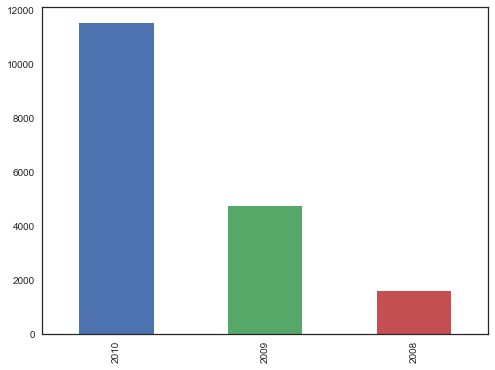

In [164]:
loan['issue_d_yr'].value_counts().plot(kind = "bar", figsize = (8,6))

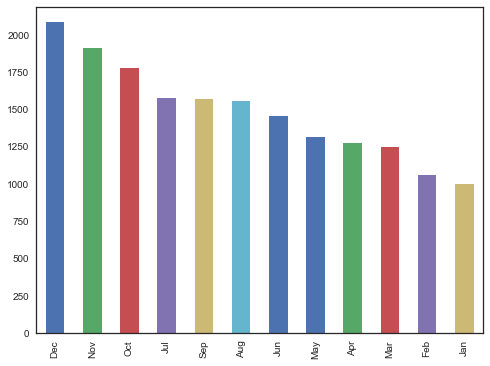

In [165]:
loan['issue_d_month'].value_counts().plot(kind = "bar", figsize = (8,6))

In [168]:
issue_d_crosstab = pd.crosstab(loan['loan_status_clean'], loan['issue_d_yr'])
issue_d_crosstab.index = ['0','1']
issue_d_crosstab

issue_d_yr,2008,2009,2010
0,1315,4122,10038
1,247,594,1491


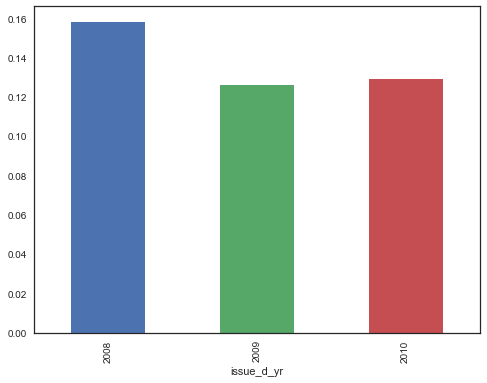

In [169]:
issue_d_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = "bar", figsize=(8,6))

In [170]:
issue_d_crosstab = pd.crosstab(loan['loan_status_clean'], loan['issue_d_month'])
issue_d_crosstab.index = ['0','1']
issue_d_crosstab

issue_d_month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1123,1363,1843,939,864,1375,1235,1109,1133,1651,1510,1330
1,149,194,240,122,135,201,216,140,177,256,264,238


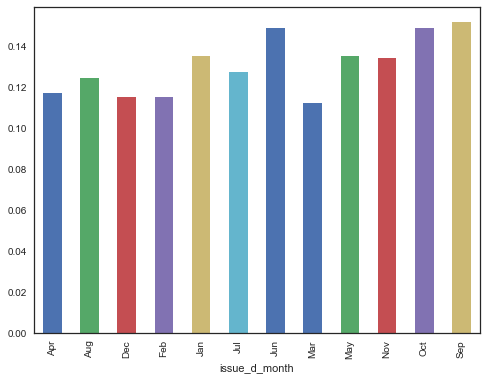

In [171]:
issue_d_crosstab.apply(lambda x: x/x.sum()).loc['1'].plot(kind = "bar", figsize=(8,6))

In [172]:
chi2_test('issue_d_yr')

p_value:0.0033


In [173]:
chi2_test('issue_d_month')

p_value:0.0021


In [174]:
chi2_test('issue_d')

p_value:0.0


### 3.7.7 initial_list_status
The initial listing status of the loan. Possible values are – W, F

In [175]:
loan['initial_list_status'].isnull().sum()

0

In [177]:
loan['initial_list_status'].value_counts()

f    17807
Name: initial_list_status, dtype: int64

## 3.8 EDA - loan payment features

In [186]:
loan[['loan_amnt','installment','funded_amnt',\
      'funded_amnt_inv','last_pymnt_amnt','last_pymnt_d',\
      'pymnt_plan','recoveries','total_pymnt','total_pymnt_inv',\
      'total_rec_int','total_rec_late_fee','total_rec_prncp',\
      'collection_recovery_fee','out_prncp','out_prncp_inv']].head(5)

,loan_amnt,installment,funded_amnt,funded_amnt_inv,last_pymnt_amnt,last_pymnt_d,pymnt_plan,recoveries,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,collection_recovery_fee,out_prncp,out_prncp_inv
21494,20000.0,424.85,20000.0,16358.045925,9979.66,Dec-2013,n,0.0,24421.720000,18773.92,4421.72,0.0,20000.00,0.0,0.0,0.0
21517,7475.0,172.85,7475.0,7475.000000,172.59,Jan-2016,n,0.0,10370.742727,10370.74,2895.74,0.0,7475.00,0.0,0.0,0.0
21528,5575.0,193.81,5575.0,5575.000000,2185.61,Feb-2013,n,0.0,6819.090000,6819.09,1244.10,0.0,5574.99,0.0,0.0,0.0
21530,2150.0,50.96,2150.0,2150.000000,1293.62,Aug-2013,n,0.0,2816.830000,2816.83,666.83,0.0,2150.00,0.0,0.0,0.0
21532,7050.0,160.34,7050.0,7050.000000,319.58,Dec-2015,n,0.0,9619.300001,9619.30,2569.30,0.0,7050.00,0.0,0.0,0.0


In [198]:
loan_pmt_numerical_feature = loan[['loan_amnt','installment','funded_amnt',\
      'funded_amnt_inv','last_pymnt_amnt',\
      'recoveries','total_pymnt','total_pymnt_inv',\
      'total_rec_int','total_rec_late_fee','total_rec_prncp',\
      'collection_recovery_fee','out_prncp','out_prncp_inv']]

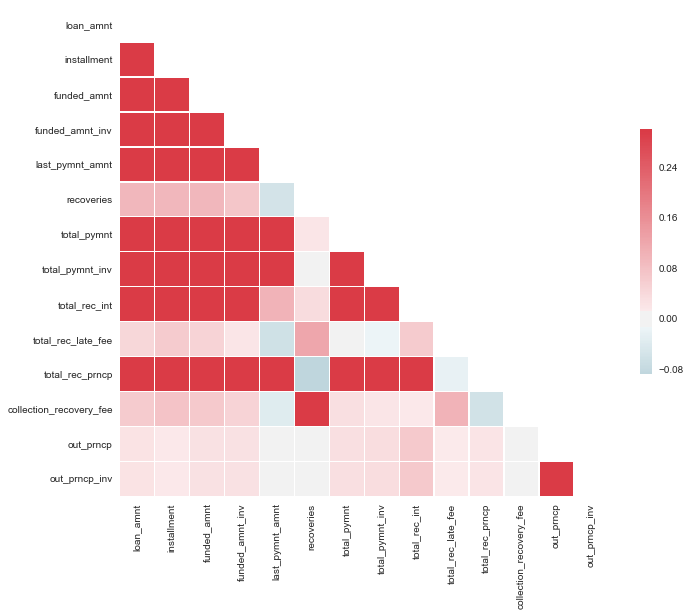

In [199]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = loan_pmt_numerical_feature.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### 3.8.1 loan_amnt
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [188]:
loan['loan_amnt'].isnull().sum()

0

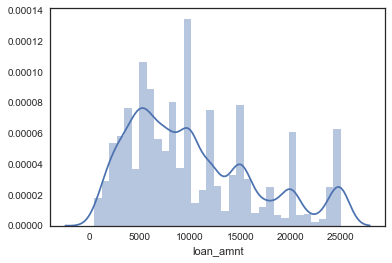

In [189]:
sns.distplot(loan['loan_amnt'])

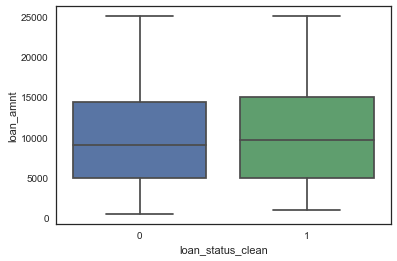

In [190]:
loan_amnt_boxplot = sns.boxplot(x = loan['loan_status_clean'], y = loan['loan_amnt'])

In [192]:
anova('loan_amnt')

p_value:0.0001


### 3.8.2 installment

In [193]:
loan['installment'].isnull().sum()

0

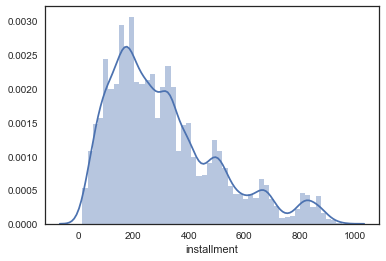

In [195]:
sns.distplot(loan['installment'])

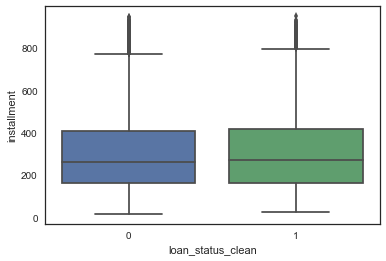

In [196]:
loan_amnt_boxplot = sns.boxplot(x = loan['loan_status_clean'], y = loan['installment'])

In [197]:
anova('installment')

p_value:0.0273


### 3.8.3 funded_amnt

In [200]:
loan['funded_amnt'].isnull().sum()

0

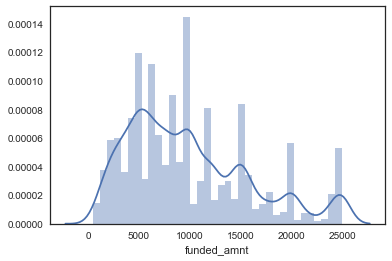

In [201]:
sns.distplot(loan['funded_amnt'])

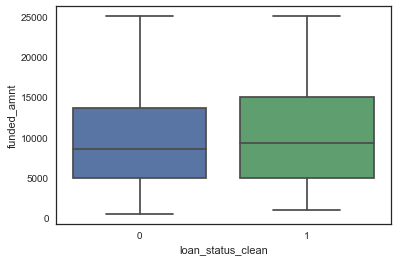

In [202]:
loan_amnt_boxplot = sns.boxplot(x = loan['loan_status_clean'], y = loan['funded_amnt'])

In [203]:
anova('funded_amnt')

p_value:0.0002


### 3.8.4 int_rate

In [205]:
loan['int_rate'].isnull().sum()

0

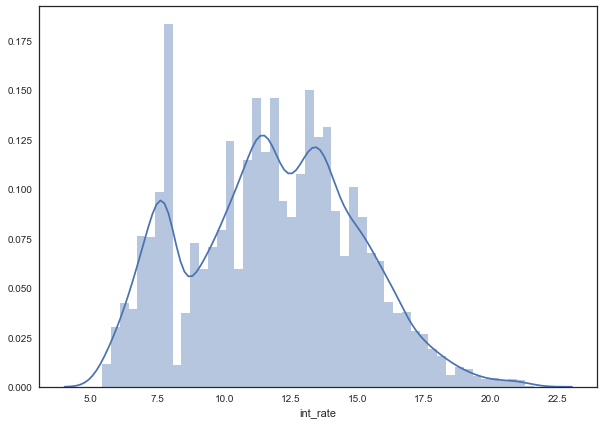

In [213]:
plt.subplots(figsize=(10,7))
sns.distplot(loan['int_rate'])

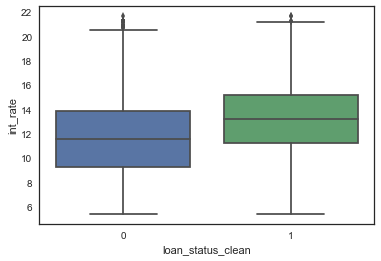

In [207]:
int_rate_boxplot = sns.boxplot(x = loan['loan_status_clean'], y = loan['int_rate'])

In [208]:
anova('int_rate')

p_value:0.0


### 3.8.5 grade

In [223]:
loan['grade'].isnull().sum()

0

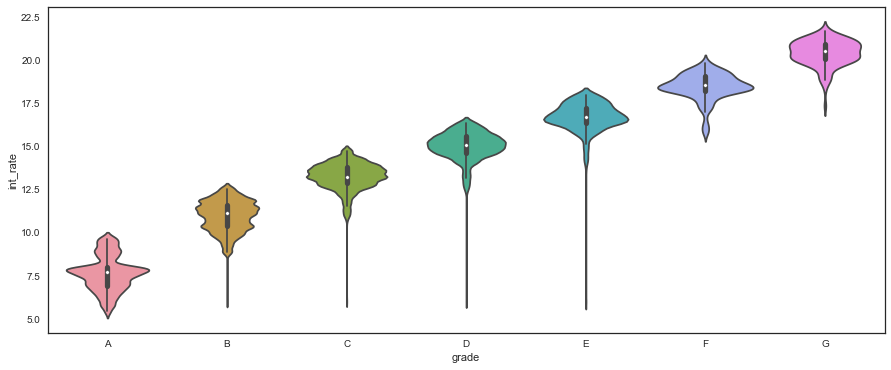

In [204]:
plt.subplots(figsize=(15,6))
sns.violinplot(x="grade", y="int_rate", data=loan, order="ABCDEFG")

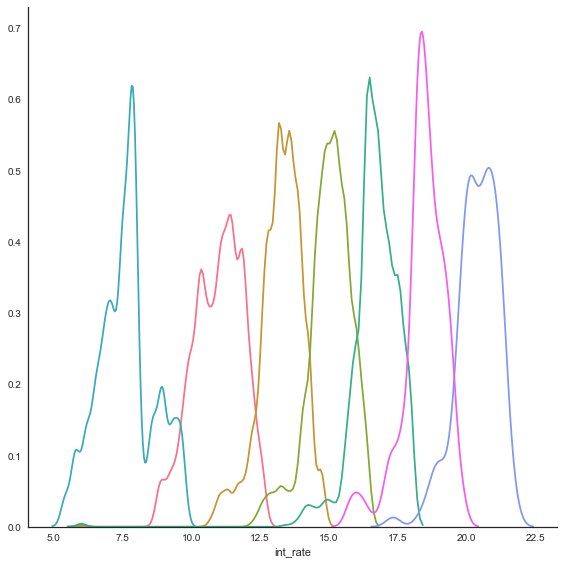

In [222]:
int_rate_grade = sns.FacetGrid(loan, hue="grade", size = 8)
int_rate_grade = int_rate_grade.map(sns.kdeplot, "int_rate")

interest rate and grade is highly related, and actually it's the same thing especially when we talk about subgrade, a more granular grade. It's totally based on insteret rate. I will only use interest rate in predicting modeling for past due or not here. 

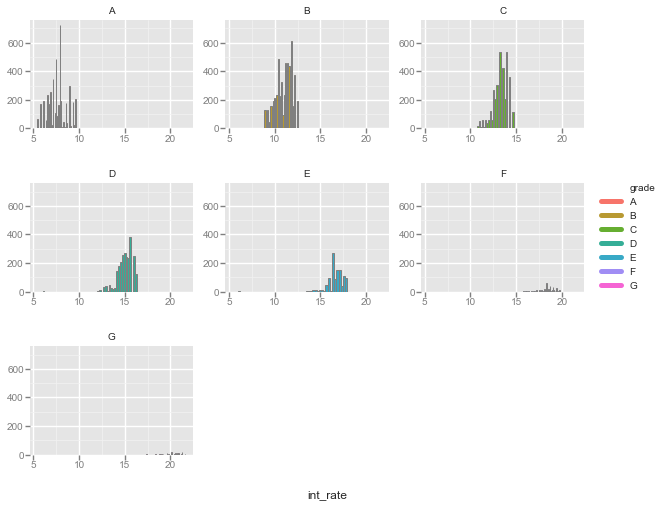

<ggplot: (-9223372036534850055)>

In [226]:
from ggplot import *
ggplot(loan, aes(x='int_rate', fill='grade')) + \
geom_histogram(bins = 50, color = "grey") + \
facet_wrap("grade") 

## 3.9 Missing value treatment - part II

After exploratory data analysis, I understood the business value of each of them, conducted hypothesis testing for each, and got an idea on which predictors are relatively more powerful to predict past due or not.

Some of the powerful predictors has some missing values:

In [230]:
miss_value_features = loan[['emp_length_group','home_ownership',\
                            'emp_title','last_credit_pull_d','revol_util','title']]

In [233]:
miss_value_features.isnull().sum()/miss_value_features.shape[0]

emp_length_group      0.017914
home_ownership        0.000000
emp_title             0.056495
last_credit_pull_d    0.000056
revol_util            0.002302
title                 0.000618
dtype: float64

From the table above, all of them have missing values less than 6%. And the home_ownership has 1 missing value that is hard-coded as "NONE", which is not shown in the stats above. I think it's ok to just remove the rows with missing values and conduct hypothesis testing again on cleaned data for feature selection.

However, before doing that, I do wnat to check one thing: emp_title has the highest amount of missing values. do the missing records have any trend on past due or not? It there is, for exmpale, most of the missing emp_title rows are past due loan, I don't want to simply remove the missing values here. Let's see:

In [262]:
emp_title_missing = loan[loan['emp_title'].isnull() == True]
emp_title_missing['loan_status_clean'].value_counts()[1]/emp_title_missing.shape[0]

0.1988071570576541

In [267]:
loan['loan_status_clean'].value_counts()[1]/loan.shape[0]

0.13095973493569946

The missing emp_title rows do have a higher past due rate. Let's not remove the missing value of emp_title for now!

In [872]:
loan_nonull = loan.dropna(subset=['emp_length_group','home_ownership',\
                                  'last_credit_pull_d','revol_util','title'])

In [873]:
loan_nonull = loan_nonull[loan_nonull.home_ownership != "NONE"]

In [874]:
loan.shape

(17807, 57)

In [875]:
loan_nonull.shape

(17436, 57)

In [876]:
loan_nonull.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                      711
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
desc                          3834
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc            

Now the data looks clean, last_pymnt_d will not be used in modeling, and desc neither - it's good for natural langauge processing if I get more time, but for now, it's fine.

## 3.10 feature engineering

### 3.10.1 last_credit_pull_d_yr

In [877]:
from datetime import datetime
loan_nonull['last_credit_pull_d_yr'] = loan_nonull['last_credit_pull_d'].apply(lambda x: datetime.strptime(str(x),'%b-%Y').strftime('%Y'))

### 3.10.2 last_credit_pull_d_month

In [878]:
loan_nonull['last_credit_pull_d_month'] = loan_nonull['last_credit_pull_d'].apply(lambda x: datetime.strptime(str(x),'%b-%Y').strftime('%b'))

## 3.11 Hypothesis testing

I divided the variables into numerical variables and categorical variables. For numerical variables, I will conduct ANOVA analysis. For cateforical variables, I will conduct chi-square test. 

### 3.11.1 ANOVA on numerical variables

In [879]:
def anova_updated(table_name, column_name):
    from scipy import stats
    grps = pd.unique(table_name.loan_status_clean.values)
    d_data = {grp:table_name[column_name][table_name.loan_status_clean == grp] for grp in grps}
    
    k = len(pd.unique(table_name.loan_status_clean))  # number of conditions
    N = len(table_name.values)  # conditions times participants
    n = table_name.groupby('loan_status_clean').size()[0] #Participants in each condition
    
    F, p = stats.f_oneway(d_data[list(d_data)[0]], d_data[list(d_data)[1]])
    print(str(round(p, 4)))

In [880]:
numerical_var = ['annual_inc','dti','inq_last_6mths','total_acc','open_acc',\
                 'delinq_2yrs','revol_bal','revol_util','loan_amnt','installment',\
                'funded_amnt','int_rate']

In [881]:
for i in numerical_var:
    anova_updated(loan_nonull, i)

0.0009
0.0001
0.0
0.0189
0.3218
0.9101
0.0161
0.0
0.0
0.0091
0.0
0.0


## needs to add column names as format to a table above

### 3.11.2 Chi-square test on categorical variables

In [882]:
categorical_var = ['addr_state','emp_length','emp_length_group','home_ownership','zip_code','zip_state',\
                  'verification_status','earliest_cr_line','earliest_cr_line_yr','earliest_cr_line_month',\
                  'last_credit_pull_d','last_credit_pull_d_yr','last_credit_pull_d_month',\
                  'purpose','term','title','issue_d','issue_d_yr','issue_d_month']

In [883]:
def chi2_test_updated(table_name, column_name):
    from scipy import stats
    cross_tab = pd.crosstab(table_name['loan_status_clean'], table_name[column_name])
    cross_tab.index = ['0', '1']
    chi2, p_value, dof, ex = stats.chi2_contingency(observed = cross_tab, correction=False) 
    print(str(round(p_value,4)))

In [884]:
for k in categorical_var:
    chi2_test_updated(loan_nonull, k)

0.0
0.6285
0.0596
0.0773
0.0
0.0
0.0004
0.3192
0.0069
0.0032
0.0
0.0
0.0
0.0
0.0
0.1066
0.0
0.0028
0.0016


In [885]:
loan_nonull['loan_status_clean'].value_counts()

0    15193
1     2243
Name: loan_status_clean, dtype: int64

In [886]:
loan['loan_status_clean'].value_counts()

0    15475
1     2332
Name: loan_status_clean, dtype: int64

### 3.11.3 feature selection based on hypothesis testing

In [887]:
numerical_var = ['annual_inc',
                 'dti',
                 'inq_last_6mths',
                 'total_acc',
                 'open_acc',
                 'delinq_2yrs',
                 'revol_bal',
                 'revol_util',
                 'loan_amnt',
                 'installment',
                'funded_amnt',
                 'int_rate'
                ]

In [888]:
categorical_var = [
#                   'addr_state',
                   'emp_length',
#                   'emp_length_group',
                   'home_ownership',
#                   'zip_code',
                   'zip_state',
                   'verification_status',
#                   'earliest_cr_line',
#                   'earliest_cr_line_yr',
#                   'earliest_cr_line_month',
#                   'last_credit_pull_d',
#                   'last_credit_pull_d_yr',
#                   'last_credit_pull_d_month',
                   'purpose',
                   'term',
#                   'title',
#                   'issue_d',
#                   'issue_d_yr',
#                   'issue_d_month'
                  ]

In [889]:
numerical_var

['annual_inc',
 'dti',
 'inq_last_6mths',
 'total_acc',
 'open_acc',
 'delinq_2yrs',
 'revol_bal',
 'revol_util',
 'loan_amnt',
 'installment',
 'funded_amnt',
 'int_rate']

In [890]:
numerical_var.extend(categorical_var)

In [891]:
# features after EDA and hypothesis testings
ft_aft_eda_ht = numerical_var

In [892]:
ft_aft_eda_ht.append('loan_status_clean')

In [893]:
loan_nonull[ft_aft_eda_ht].shape

(17436, 19)

In [894]:
loan_nonull = loan_nonull[ft_aft_eda_ht]

In [895]:
#loan_nonull.to_csv('data/loan_nonull.csv', index=False)

In [896]:
ln = loan_nonull

# 4. Data preprocessing

## 4.1 define target variable

In [897]:
y = ln['loan_status_clean']
X = ln.drop('loan_status_clean', axis = 1)

## 4.3 One-hot encoding

In [898]:
X = pd.get_dummies(X[categorical_var], drop_first=True)

## 4.2 train-test split

In [899]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

## 4.3 Standardization

In [900]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 4.4 Dimension reduction with PCA

### 4.4.1 generate principal components

In [901]:
X_train.shape

(10461, 832)

In [902]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

# generate principal components
pca = PCA(n_components = 50)
train_components = pca.fit_transform(X_train)

I need to think about hot to optimize the choice of number of components

In [903]:
test_components = pca.transform(X_test)

In [904]:
pca.components_.shape

(50, 832)

### 4.4.2 how much variance does the procipal components explained?

In [905]:
pca.explained_variance_

array([0.30310733, 0.28525175, 0.22392098, 0.16464584, 0.15430453,
       0.1343917 , 0.12308862, 0.12193264, 0.09872863, 0.09517376,
       0.08629425, 0.08380665, 0.06619738, 0.06122027, 0.05488663,
       0.05051497, 0.04256881, 0.03832198, 0.03345488, 0.03102837,
       0.02061567, 0.01690402, 0.01642212, 0.01573491, 0.01538164,
       0.01349601, 0.01329529, 0.01292471, 0.01277547, 0.01255081,
       0.01204427, 0.01134666, 0.01052403, 0.01014223, 0.00994638,
       0.00896164, 0.00865565, 0.0083661 , 0.00809171, 0.00775674,
       0.00767947, 0.00707985, 0.00660277, 0.0065777 , 0.00647671,
       0.00636474, 0.00632271, 0.00627746, 0.00620151, 0.00614749])

Text(0,0.5,'Variance Explained')

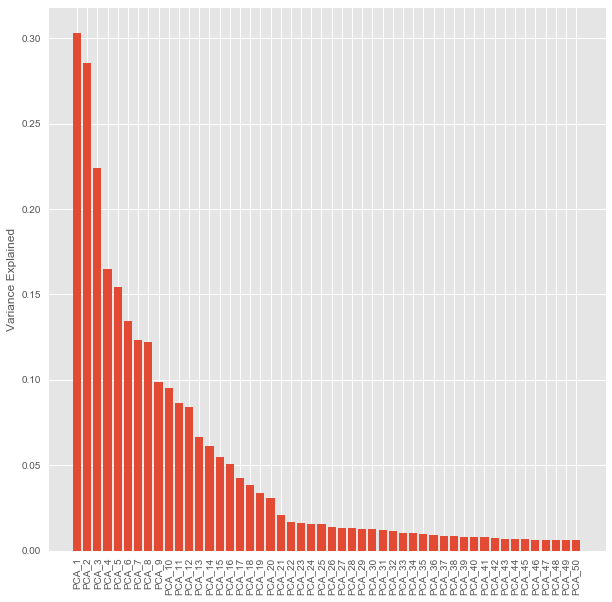

In [906]:
plt.style.use("ggplot")
pca_range = np.arange(n_components) + 1
pca_names = ("PCA_%s" % i for i in pca_range)
plt.figure(figsize=(10, 10))
plt.bar(pca_range, pca.explained_variance_, align = 'center')
xticks = plt.xticks(pca_range, pca_names, rotation = 90)
plt.ylabel('Variance Explained')

Take a closer look at top 10 components

Text(0,0.5,'Proportion of Variance Explained')

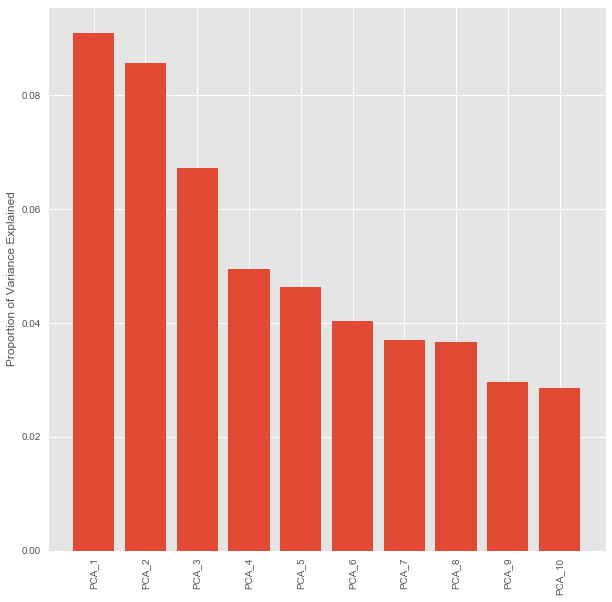

In [907]:
pca_range = np.arange(10) + 1
pca_names = ("PCA_%s" % i for i in pca_range)
plt.figure(figsize=(10, 10))
plt.bar(pca_range, pca.explained_variance_ratio_[:10], align = 'center')
xticks = plt.xticks(pca_range, pca_names, rotation = 90)
plt.ylabel('Proportion of Variance Explained')

# 5. Modeling

## 5.1 Logistics regression with regularization

### 5.1.1 go through LR step by step

#### 5.1.1.1 train the model

In [931]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
lr = LogisticRegression(C=10, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

In [909]:
y_train_pred.shape

(10461,)

#### 5.1.1.2 calculate metrics score for the model

In [910]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [922]:
def print_results(y_true, y_pred):
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_true, y_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_true, y_pred)))
#    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_true, y_pred)))

In [923]:
print("Training set scores:")
print_results(y_train, y_train_pred)

Training set scores:
Accuracy of the Logistic Regression is: 0.8755377114998566
Precision of the Logistic Regression is: 0.6808510638297872
Recall of the Logistic Regression is: 0.04790419161676647
f1-score of the Logistic Regression is: 0.0895104895104895


In [924]:
print("Test set scores:")
print_results(y_test, y_test_pred)

Test set scores:
Accuracy of the Logistic Regression is: 0.8649462365591398
Precision of the Logistic Regression is: 0.18181818181818182
Recall of the Logistic Regression is: 0.011025358324145534
f1-score of the Logistic Regression is: 0.020790020790020788


### 5.1.2 create function

In [947]:
def logreg(c, X_train, X_test, y_train, y_test):
    # Import logistic regression from sklearn
    from sklearn.linear_model import LogisticRegression

    # Initialize model by providing parameters
    lr = LogisticRegression(C=c, fit_intercept=True)

    # Fit a model by providing X and y from training set
    lr.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = lr.predict(X_train)

    # Make predictions on test data
    y_test_pred = lr.predict(X_test)
    
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_train, y_train_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_train, y_train_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_train, y_train_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_train, y_train_pred)))
    
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

In [1009]:
logreg(10000, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.8754421183443265
Precision of the Logistic Regression is: 0.6386554621848739
Recall of the Logistic Regression is: 0.05688622754491018
f1-score of the Logistic Regression is: 0.10446735395189004
roc_auc_score of the logistics regression is: 0.5260869493888934
Testing set scores:
Accuracy of the Logistic Regression is: 0.8627956989247312
Precision of the Logistic Regression is: 0.1527777777777778
Recall of the Logistic Regression is: 0.012127894156560088
f1-score of the Logistic Regression is: 0.02247191011235955
roc_auc_score of the logistics regression is: 0.5010375792470342


### 5.1.3 Understanding the Estimated Coefficients

In [1028]:
selected_features = numerical_var

In [1031]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
15,verification_status,0.794385
6,revol_bal,0.553481
3,total_acc,0.473096
4,open_acc,0.434577
9,installment,0.388793
1,dti,0.161598
2,inq_last_6mths,0.136490
5,delinq_2yrs,0.083576
7,revol_util,0.070512
12,emp_length,0.048575


In [1034]:
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (10,20)

#ax = df_coeffs.plot.barh()
#t = np.arange(X.shape[1])
#ax.set_yticks(t)
#ax.set_yticklabels(df_coeffs['feature'])
#plt.show()

## 5.2 Random Forest classifier

In [956]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [957]:
    # Make prediction on the training data
    y_train_pred = model_rfc.predict(X_train)

    # Make predictions on test data
    y_test_pred = model_rfc.predict(X_test)
    
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_train, y_train_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_train, y_train_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_train, y_train_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_train, y_train_pred)))
    
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Training set scores:
Accuracy of the Logistic Regression is: 0.9636746008985757
Precision of the Logistic Regression is: 0.9526515151515151
Recall of the Logistic Regression is: 0.7529940119760479
f1-score of the Logistic Regression is: 0.8411371237458194
roc_auc_score of the logistics regression is: 0.8737572799606267
Testing set scores:
Accuracy of the Logistic Regression is: 0.8481720430107527
Precision of the Logistic Regression is: 0.12
Recall of the Logistic Regression is: 0.026460859977949284
f1-score of the Logistic Regression is: 0.04336043360433604
roc_auc_score of the logistics regression is: 0.49872812280374057


In [1010]:
def random_forest(n, X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier

    model_rfc = RandomForestClassifier(max_features = n)
    model_rfc.fit(X_train, y_train)
    
    # Make prediction on the training data
    y_train_pred = model_rfc.predict(X_train)

    # Make predictions on test data
    y_test_pred = model_rfc.predict(X_test)
    
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_train, y_train_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_train, y_train_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_train, y_train_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_train, y_train_pred)))
    
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

In [1017]:
random_forest(100, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.9631010419653953
Precision of the Logistic Regression is: 0.9541108986615678
Recall of the Logistic Regression is: 0.7470059880239521
f1-score of the Logistic Regression is: 0.837951301427372
roc_auc_score of the logistics regression is: 0.8708728570256747
Testing set scores:
Accuracy of the Logistic Regression is: 0.8415770609318997
Precision of the Logistic Regression is: 0.14130434782608695
Recall of the Logistic Regression is: 0.04299889746416759
f1-score of the Logistic Regression is: 0.06593406593406592
roc_auc_score of the logistics regression is: 0.5019707737156038


## 5.3 gradient boosting classifier

In [1018]:
def grdboost(k, X_train, X_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingRegressor 
    from sklearn.ensemble import GradientBoostingClassifier
    gbrt=GradientBoostingClassifier(n_estimators=100, max_features = k) 
    gbrt.fit(X_train, y_train) 
#    y_pred=gbrt.predict(X_test) 
    
    y_train_pred = gbrt.predict(X_train)
    y_test_pred = gbrt.predict(X_test)
    
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is #able to decipher. 
#print ("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
#print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test)) 

#more stats here
    from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
    
    print("Training set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_train, y_train_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_train, y_train_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_train, y_train_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_train, y_train_pred)))
    
    print("Testing set scores:")
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
    print("roc_auc_score of the logistics regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

In [1019]:
grdboost(10, X_train, X_test, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.8724787305228946
Precision of the Logistic Regression is: 1.0
Recall of the Logistic Regression is: 0.0014970059880239522
f1-score of the Logistic Regression is: 0.0029895366218236174
roc_auc_score of the logistics regression is: 0.500748502994012
Testing set scores:
Accuracy of the Logistic Regression is: 0.869820788530466
Precision of the Logistic Regression is: 0.0
Recall of the Logistic Regression is: 0.0
f1-score of the Logistic Regression is: 0.0
roc_auc_score of the logistics regression is: 0.4999176005273566


In [970]:
#One of the benefits of growing trees is that we can understand how important each of the features are 
print ("Feature Importances") 
print (gbrt.feature_importances_) 
print 

Feature Importances
[8.31086255e-03 4.21424569e-03 1.19220619e-02 4.48064344e-03
 2.71457998e-02 3.45083810e-03 2.26520731e-03 5.00218758e-06
 6.58937418e-03 1.29895184e-02 1.17977796e-03 1.69799557e-02
 1.16126992e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.59381699e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.74507570e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.78721694e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.11975899e-02 0.00000000e+00 0.00000000e+00 1.47111851e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.0

<function print>

### 5.4 use principal components as features 

In [952]:
logreg(10000, train_components, test_components, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.8722875442118344
Precision of the Logistic Regression is: 0.5
Recall of the Logistic Regression is: 0.0014970059880239522
f1-score of the Logistic Regression is: 0.002985074626865672
roc_auc_score of the logistics regression is: 0.5006389139529162
Testing set scores:
Accuracy of the Logistic Regression is: 0.8696774193548387
Precision of the Logistic Regression is: 0.0
Recall of the Logistic Regression is: 0.0
f1-score of the Logistic Regression is: 0.0
roc_auc_score of the logistics regression is: 0.49983520105471324


In [960]:
random_forest(train_components, test_components, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.9652996845425867
Precision of the Logistic Regression is: 0.9517177344475395
Recall of the Logistic Regression is: 0.7672155688622755
f1-score of the Logistic Regression is: 0.849564857024451
roc_auc_score of the logistics regression is: 0.8807584693626445
Testing set scores:
Accuracy of the Logistic Regression is: 0.8493189964157706
Precision of the Logistic Regression is: 0.14
Recall of the Logistic Regression is: 0.030871003307607496
f1-score of the Logistic Regression is: 0.050587172538392046
roc_auc_score of the logistics regression is: 0.5012627923591432


In [999]:
grdboost(train_components, test_components, y_train, y_test)

Training set scores:
Accuracy of the Logistic Regression is: 0.8759200841219769
Precision of the Logistic Regression is: 1.0
Recall of the Logistic Regression is: 0.02844311377245509
f1-score of the Logistic Regression is: 0.055312954876273655
roc_auc_score of the logistics regression is: 0.5142215568862275
Testing set scores:
Accuracy of the Logistic Regression is: 0.8688172043010752
Precision of the Logistic Regression is: 0.2777777777777778
Recall of the Logistic Regression is: 0.005512679162072767
f1-score of the Logistic Regression is: 0.010810810810810811
roc_auc_score of the logistics regression is: 0.5016851464366725


### 5.5 Model with synthetically balanced classes

In [953]:
#!pip install imblearn

In [975]:
from imblearn.over_sampling import SMOTE
index_split = int(len(X)/2)
X_scaled = preprocessing.scale(X)
X_train_smt, y_train_smt = SMOTE().fit_sample(X_scaled[0:index_split, :], y[0:index_split])
X_test_smt, y_test_smt = X_scaled[index_split:], y[index_split:]

#scores = cross_val_score(clf, X_scaled, y , cv=5, scoring='roc_auc')

#models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

In [979]:
logreg(10000, X_train_smt, X_test_smt, y_train_smt, y_test_smt)

Training set scores:
Accuracy of the Logistic Regression is: 0.7327380952380952
Precision of the Logistic Regression is: 0.7221871448415204
Recall of the Logistic Regression is: 0.7564814814814815
f1-score of the Logistic Regression is: 0.7389366238129078
roc_auc_score of the logistics regression is: 0.7327380952380953
Testing set scores:
Accuracy of the Logistic Regression is: 0.7329662766689607
Precision of the Logistic Regression is: 0.1598248494800219
Recall of the Logistic Regression is: 0.26912442396313363
f1-score of the Logistic Regression is: 0.20054945054945056
roc_auc_score of the logistics regression is: 0.5340119696129044


In [961]:
random_forest(X_train_smt, X_test_smt, y_train_smt, y_test_smt)

Training set scores:
Accuracy of the Logistic Regression is: 0.9837301587301587
Precision of the Logistic Regression is: 0.9948579161028417
Recall of the Logistic Regression is: 0.9724867724867725
f1-score of the Logistic Regression is: 0.9835451505016722
roc_auc_score of the logistics regression is: 0.9837301587301588
Testing set scores:
Accuracy of the Logistic Regression is: 0.8669419591649461
Precision of the Logistic Regression is: 0.0967741935483871
Recall of the Logistic Regression is: 0.008294930875576038
f1-score of the Logistic Regression is: 0.015280135823429542
roc_auc_score of the logistics regression is: 0.49864504175116414


In [1000]:
grdboost(X_train_smt, X_test_smt, y_train_smt, y_test_smt)

Training set scores:
Accuracy of the Logistic Regression is: 0.9156084656084656
Precision of the Logistic Regression is: 0.9992055926278995
Recall of the Logistic Regression is: 0.8318783068783069
f1-score of the Logistic Regression is: 0.9078966363505125
roc_auc_score of the logistics regression is: 0.9156084656084655
Testing set scores:
Accuracy of the Logistic Regression is: 0.8756595549437944
Precision of the Logistic Regression is: 1.0
Recall of the Logistic Regression is: 0.0009216589861751152
f1-score of the Logistic Regression is: 0.001841620626151013
roc_auc_score of the logistics regression is: 0.5004608294930876


# 6. reference


    
seaborn visualization gallary:https://seaborn.pydata.org/examples/index.html

good thinking process, but in R：https://www.kaggle.com/erykwalczak/initial-loan-book-analysis

predict loan status：https://www.kaggle.com/jlrsource/predicting-loan-status-with-python

high vote kaggle kernal, with good viz：https://www.kaggle.com/evanmiller/python-for-padawans

interesting viz： https://www.kaggle.com/kabure/eda-lending-club

python machine learning chap 2&3, 3 has some random forest，and more for ensambling， good reference for classification modeling：
1. Selecting features and collecting training samples.
2. Choosing a performance metric.
3. Choosing a classi er and optimization algorithm.
4. Evaluating the performance of the model.
5. Tuning the algorithm.

predicting rate of return, seems very make sense from a investor point of view, but I didn't get it on "quantile gap": https://github.com/savarin/rateflask/blob/master/notebooks/presentation.pdf
there code in python: http://nbviewer.jupyter.org/github/savarin/rateflask/blob/master/notebooks/mechanics.ipynb

Very deep analysis for default prediction, very tough: http://cs229.stanford.edu/proj2015/199_report.pdf

talks about ML model and API, can be exmpale for bonus points: https://codyhatch.com/projects/lending-club-default-predictor.html

Predict loan grades with Neural Network, building ML pipeline on AWS: https://medium.com/universal-mind/predicting-loan-grades-with-a-neural-network-a-machine-learning-pipeline-on-aws-65d5e1d2f08e

At the end of the projects, decribes very good directions of analysis using lending club data: https://nycdatascience.com/blog/student-works/project-1-analysis-of-lending-clubs-data/
their code in R: http://rpubs.com/jfdarre/119147

* very very nice background article: http://www.lendingmemo.com/lending-club-prosper-default-rates/

relatively easy to understand, python default predicting example, should take a look: https://www.kaggle.com/jkjay333/analyze-lending-loan-club?scriptVersionId=1896470

How Lending Club gauge credit risk: https://www.lendingclub.com/foliofn/rateDetail.action